# Analysis of the dataset
In the following code we will analyze and understand the dataset and we'll pick one or many approaches to model a classifier and evaluate its performance. 

The first step will consist in understanding the main features of the dataset, if it is unbalanced, if there are many null values or if there are missing values to replace. Consequently, we'll adopt a strategy to transform the data in a useful format for the classfier. Based on the characteristics of the data we coul pick different classifiers and at the end evaluating their performance. 

In the last part we'll show the results with some final considerations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

path_data = '../archive.zip'
path_save_data = '../data/'

## Features and data understanding

In the following cells we'll discuss about the full dataset without separating, for now, training and test set.

If we display a full description of the dataset we can figure out many useful things:
- V1, ..., V28 are 28 features results of the PCA process
- Time, Amount and Class are the only "unchanged" features

As the name says, ***Time*** contains the seconds elapsed between each transaction and the first transaction in the dataset.

***Amount*** describes the amount of cash transferred with the transaction and ***Class*** informs us if the transaction has been labeled as fraudulent (1) or not (0). 

All the features are **numerical.**

In [3]:
df = pd.read_csv(path_data, sep=',')
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No null values are present inside the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
other checks on data.....

### Distribution fraud and non-fraud

We can see from the next graph how the fraud class is the minority class whereas the non-fraud is the majority one. This is a case of unbalanced dataset so we should apply measure to solve this issue.

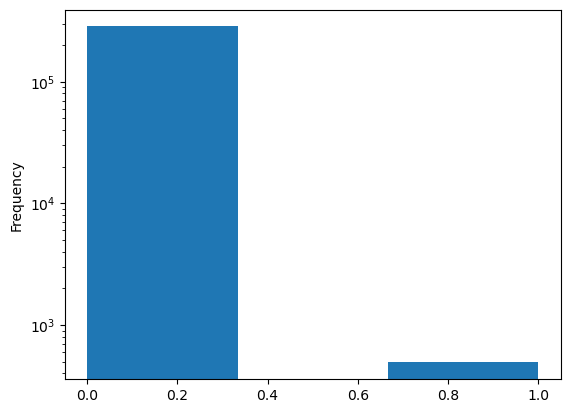

In [4]:
df["Class"].plot(kind="hist", bins=3, logy=True)
plt.show()

From the distribution of the time we can see that the transaction has been executed mainly around 50k and 150k seconds (13 hours and 41 hours) after the first transaction and that there is no uniform distribution, this is a normal behaviour because the data are extracted from a real scenario in which there is no specific pattern. We don't know when the monitoring of the data began so we cannot infer anything, the only information that we have is that the monitoring last two days.

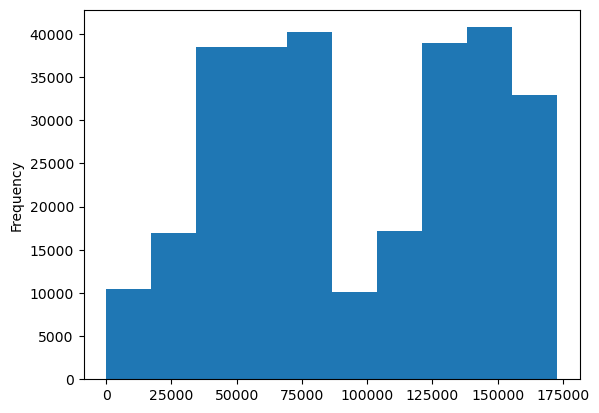

In [5]:
df["Time"].plot(kind="hist")
plt.show()

The data are not gathered in a particular time, so we can avoid any additional modification.

Next, from the amount histogram we can see that we have some **outliers**, which should be managed in case we decide to use some particular "neighborhood" methods.

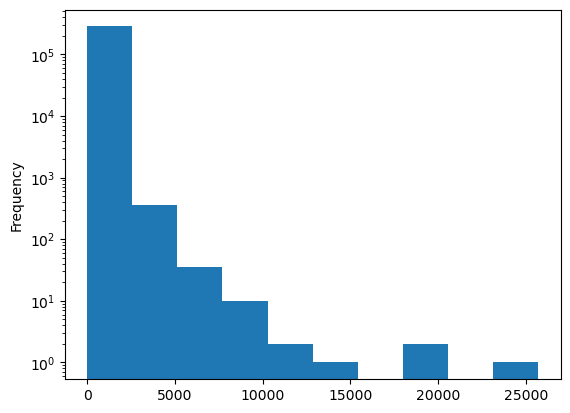

In [6]:
df["Amount"].plot(kind="hist", logy=True)
plt.show()

fare grafico distribuzione tempo e class, amount e class, tempo e amoun

### Checking duplicated fields
Next, we check if there are duplicated fields. In the positive case we'll remove them becuase useless to our analysis. 

In [7]:
if 'True' in (df.duplicated()):
    print("Duplicated fields")
else:
    print("No duplicated fields")

No duplicated fields


## Handle class imbalance
From the previous graph, we can observe the imbalance between the two classes "non-fraud", "fraud" where the positive class is the minority with respect to the negative one. To handle class imbalance there are two main approaches:

- **oversampling:** the positive class is "augmented" to obtain an equal distribution of the two classes
- **undersampling:** the negative class is reduced to obtain the same number of elements per classes

We'll analyze both the two approaches and we'll see the final results in both the cases.

In [4]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [5]:
print(len(df.columns))
print("X shape:", x.shape, " y shape:", y.shape)

31
X shape: (284807, 30)  y shape: (284807,)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset in test and training set
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, train_size=0.7, \
                                                    random_state=0, stratify=y)

In [7]:
print("Train:", train_y.shape, " Test:", test_y.shape) 

Train: (199364,)  Test: (85443,)


The previous step is **ESSENTIAL** because it is one of the most pitfalls in sampling. In the resampling setting, there is a common pitfall that corresponds to *resample the entire dataset before splitting it into a train and a test partitions.* Note that it would be equivalent to resample the train and test partitions as well. Such of a processing leads to two issues:

- the model will not be tested on a dataset with class distribution similar to the real use-case. Indeed, by resampling the entire dataset, both the training and testing set will be potentially balanced while the model should be tested on the natural imbalanced dataset to evaluate the potential bias of the model;
- the resampling procedure might use information about samples in the dataset to either generate or select some of the samples. Therefore, we might use information of samples which will be later used as testing samples which is the typical data leakage issue.

Before diving into the different techniques of sampling, I'll list all the references that helps me choosing the right methods:
- [1]Yu, L. and Zhou, N., "Survey of Imbalanced Data Methodologies", 2021.
- [2] Laurikkala, J., "Improving Identification of Difficult Small Classes by Balancing Class Distribution, 2001.

### Random sampling
The first sampling that we are gonna do will be the **random** one. We'll do both random undersampling and oversampling, this we'll give us a sort of treshold to which compare the other methods. Random sampling represents the basic method to apply when you're trying to fix class imbalance, next we'll explore more and more advanced and sophisticated techniques.

We'll explore other techniques because the random sampling can remove, in undersampling, useful data from the majority class, and add redundant data in oversampling leading to an overfitting.

In [29]:
count = Counter(train_y)
print("Distribution before sampling: 0:{} 1:{}".format(count[0], count[1]))

Distribution before sampling: 0:199020 1:344


In [7]:
from imblearn.over_sampling import RandomOverSampler

rand = RandomOverSampler(random_state=0) # seed np.random
orand_x, orand_y = rand.fit_resample(train_x, train_y)

print("Distribution: {}".format(Counter(orand_y)))

Distribution: Counter({0: 199020, 1: 199020})


In [8]:
from imblearn.under_sampling import RandomUnderSampler

rand = RandomUnderSampler(random_state=0) # seed np.random
urand_x, urand_y = rand.fit_resample(train_x, train_y)

print("Distribution: {}".format(Counter(urand_y)))

Distribution: Counter({0: 344, 1: 344})


### Oversampling (SMOTE)
Let's start with oversampling. We'll use the **Synthetic Minority Over-sampling Technique (SMOTE)** method; this allows for the generation of synthetic samples by interpolating the values that are present within the class subjected to oversampling. 

There are many techniques of oversampling in the literature, I wanted to pick this method because it was studied in class and it is one of the most used, an alternative to this could be **ADASYN**. 

The biggest problem of SMOTE is the *tendency to link inliers and outliers* leading to a sub-optimal result. For this reason we also employ a SMOTE variants called **borderlineSMOTE.** DID WE HAVE OUTLIERS???? SEE DISTRIBUTION ALSO OF Vx

#### SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_x, smote_y = smote.fit_resample(train_x, train_y)

smote_x.to_csv(path_save_data+'smote_x')
smote_y.to_csv(path_save_data+'smote_y')

print("Distribution after oversampling: {}".format(Counter(smote_y)))

Distribution after oversampling: Counter({0: 199020, 1: 199020})


#### borderline SMOTE
Source: *H. Han, W. Wen-Yuan, M. Bing-Huan, "Borderline-SMOTE: a new over-sampling method in imbalanced data sets learning", 2005.*

Borderline SMOTE has been proved (Source) to perform better with respect to SMOTE and RandomOversampling for this reason we will use it in this comparison.

more explanation.... also the difference between 1 and 2

In [13]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(kind='borderline-1')
bsmote_x, bsmote_y = bsmote.fit_resample(train_x, train_y)

bsmote_x.to_csv(path_save_data+'bsmote_x')
bsmote_y.to_csv(path_save_data+'bsmote_y')

print("Distribution after oversampling: {}".format(Counter(bsmote_y)))

Distribution after oversampling: Counter({0: 199020, 1: 199020})


### Undersampling
*What is the problem of undersampling?* Since the samples from the majority classes are removed, this method can potentially **ignore useful information from those removed samples.** Therefore, several under-sampling approaches are proposed to selectively remove samples from the majority class so that the information could be largely retained in the training data set. 

Given the fact that we don't have many data, we can afford computation-intensive technique, which use a combination of undersampling technique like **Neighborhood cleaning rule** but first we want to test if the single techniques give us good results.

#### Edited Nearest Neighbor (ENN)
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html#imblearn.under_sampling.EditedNearestNeighbours

ENN applies a nearest-neighbors algorithm and “edit” the dataset by removing samples which do not agree “enough” with their neighboorhood. The "enough" is guided by the *kind_sel* parameter, which for this test we'll use as default, equal to *all*.

This method could be **computationally intensive** in standard devices, so we will not use advanced technique of this algorithm which for instance, runs multiple tests or increase the number of neighbors. 

The results are not optimal only a small fraction of the majority class have been deleted.

In [35]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
enn_x, enn_y = enn.fit_resample(train_x, train_y)

enn_x.to_csv(path_save_data+'enn_x')
enn_y.to_csv(path_save_data+'enn_y')

print("Distribution: {}".format(Counter(enn_y)))

Distribution: Counter({0: 198699, 1: 344})


In [39]:
print("Elements removed: ", len(train_y)-len(enn_y))

Elements removed:  321


#### Condensed Nearest Neighbor (CNN)
https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py

The survey ([1]) we follow, to pick the sampling methods, lists two main undersampling approaches: ENN and CNN with their advanced variants.

CNN uses a 1 nearest neighbor rule to iteratively decide if a sample should be removed or not. It'll add all the elements to the new dataset until there are no more no more samples to be added. CNN is **sensitive to noise** and will add noisy samples (PROVES???). To avoid this we can use the *One-sided selection* or a better approach called *Neighborhood cleaning rule*.

We avoid using CNN because it takes a lot of time to execute even if it is not so computationally heavy, so we skip directly to the improved version.

#### Neighborhood cleaning rule
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html#imblearn.under_sampling.NeighbourhoodCleaningRule

This method use a combination of ENN and other methods to remove noisy samples. 
From reference [2] the results show that Neighbordhood cleaning rule performs better than One-sided selection on more than ten datasets

In [9]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
ncr_x, ncr_y = ncr.fit_resample(train_x, train_y)

ncr_x.to_csv(path_save_data+'ncr_x')
ncr_y.to_csv(path_save_data+'ncr_y')

print("Distribution: {}".format(Counter(ncr_y)))

Distribution: Counter({0: 198125, 1: 344})


In [10]:
print("Elements removed: ", len(train_y)-len(ncr_y))

Elements removed:  895


Given the fact that the undersampling methods didn't return good results, we can classify these data using a cost-sensitive approach, in particular **Weighted Random Forest**, which works pretty well on unbalanced data and then we can compare the result of using the same technique on the original dataset, to see if the undersampling really remove noisy samples.

### Combination over and under sampling
As we said before the SMOTE can generate noisy data due to fact that it links inliers and outliers data. This issue can be solved by cleaning the space resulting from oversampling. A possible way is using the *Edited Nearest Neighbours* to do so, this mechanism is implemented in the **SMOTEENN.**

We will run this method only once and then we'll save the results due to the fact that this process is **very computationally demanding.**

In [14]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
smote_enn_x, smote_enn_y = smote_enn.fit_resample(train_x, train_y)

smote_enn_x.to_csv(path_save_data+'smote_enn_x')
smote_enn_y.to_csv(path_save_data+'smote_enn_y')

print("Distribution after oversampling: {}".format(Counter(smote_enn_y)))

Distribution after oversampling: Counter({1: 190618, 0: 181766})


Find a paper for each method and see advantages and tips

## Classification methods
The classification phase is subdivided into two subcategories:
- Model selection and learning phase
- Predicting phase

We'll use multiple classifiers due to the fact that we still have unbalanced data but also balanced one.

https://scikit-learn.org/stable/_static/ml_map.png

For unbalanced data (original dataset, NCR, ENN) we pick **Weighted Random Forest** which is well-suited for this kind of data (PROVES???) whereas for the balanced one (ROS, RUS, SMOTE, borderlineSMOTE, SMOTEENN) we pick .... temporary taken from the images **SGD Classifier** for RUS and **Linear SVC** for all the others

### Weighted Random Forest 

.....

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import math

print("Test :", Counter(test_y))

Test : Counter({0: 85295, 1: 148})


In [23]:
# Load datasets
ncr_x = pd.read_csv(path_save_data+'ncr_x', index_col=0)
ncr_y = pd.read_csv(path_save_data+'ncr_y', index_col=0)
ncr_y = ncr_y.Class.values

enn_x = pd.read_csv(path_save_data+'enn_x', index_col=0)
enn_y = pd.read_csv(path_save_data+'enn_y', index_col=0)
enn_y = enn_y.Class.values

# train_x, train_y

In [29]:
# Check SHAPE
print("NCR   : ", ncr_x.shape, ncr_y.shape, Counter(ncr_y))
print("ENN   : ", enn_x.shape, enn_y.shape, Counter(enn_y))
print("Train : ", train_x.shape, train_y.shape, Counter(train_y))

NCR   :  (198469, 30) (198469,) Counter({0: 198125, 1: 344})
ENN   :  (199043, 30) (199043,) Counter({0: 198699, 1: 344})
Train :  (199364, 30) (199364,) Counter({0: 199020, 1: 344})


CHANGE ORDER, FROM ORIGINAL , ENN TO NCR

#### Neighborhood cleaning rule

THERE IS A MORE OFFICIAL AND TESTED WAY TO PICK THE WEIGHT??

In [45]:
# 100 : 198125 = x : 344
c = Counter(ncr_y)
x = ((100*c[1]) / c[0])*100
w = int(math.ceil(x))
print(x, "-->", w)

17.36277602523659 --> 18


In [39]:
# Fitting
rf_model = RandomForestClassifier(class_weight={0:1, 1:w})
rf_model.fit(ncr_x, ncr_y)

RandomForestClassifier(class_weight={0: 1, 1: 18})

In [42]:
# Prediction
y_pred_rf = rf_model.predict(test_x)

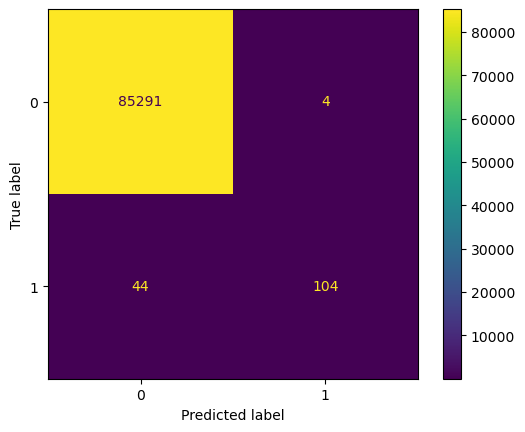

In [43]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred_rf)
plt.show()

In [44]:
print(accuracy_score(test_y, y_pred_rf))
print(classification_report(test_y, y_pred_rf))

0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### Edited Nearest Neighbor

In [46]:
c = Counter(enn_y)
x = ((100*c[1]) / c[0])*100
w = int(math.ceil(x))
print(x, "-->", w)

17.31261858388819 --> 18


In [47]:
# Fitting
rf_model = RandomForestClassifier(class_weight={0:1, 1:w})
rf_model.fit(enn_x, enn_y)

RandomForestClassifier(class_weight={0: 1, 1: 18})

In [48]:
# Prediction
y_pred_rf = rf_model.predict(test_x)

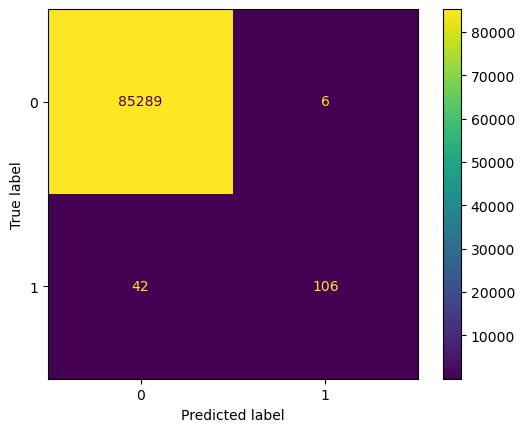

In [49]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred_rf)
plt.show()

In [50]:
print(accuracy_score(test_y, y_pred_rf))
print(classification_report(test_y, y_pred_rf))

0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### Original dataset

In [51]:
c = Counter(train_y)
x = ((100*c[1]) / c[0])*100
w = int(math.ceil(x))
print(x, "-->", w)

17.28469500552708 --> 18


In [52]:
# Fitting
rf_model = RandomForestClassifier(class_weight={0:1, 1:w})
rf_model.fit(train_x, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 18})

In [53]:
# Prediction
y_pred_rf = rf_model.predict(test_x)

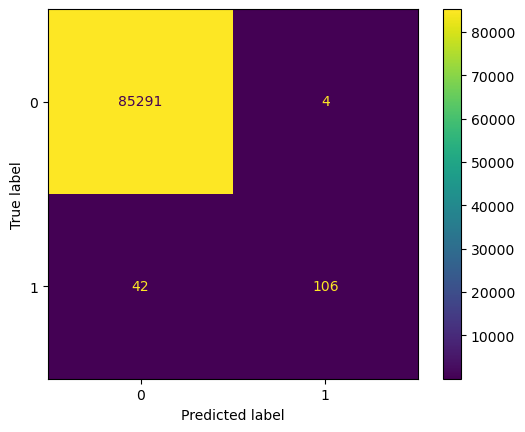

In [54]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred_rf)
plt.show()

In [55]:
print(accuracy_score(test_y, y_pred_rf))
print(classification_report(test_y, y_pred_rf))

0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Se scarto ENN e tengo solo NCR visto che il secondo elimina 500 elementi in più ma la differenza tra i due è minima se non nulla?